In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

In [2]:
import jax
from jax import jit
import jax.numpy as jnp
import numpy as np

import time
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import matplotlib.pyplot as plt

from rl_working.ppo import PPO_make_train

Platform used: 
cpu
[CpuDevice(id=0)]
JaX backend:  cpu
Not connected to a GPU
Not connected to a GPU
Not connected to a GPU
Not connected to a GPU
Not connected to a GPU
Not connected to a GPU
Not connected to a GPU


In [3]:
### SEEDING ###
rng = jax.random.PRNGKey(seed=30)

In [4]:
transmon_reset_env_config = {
    "kappa": 5., # 4.25 initially
    "chi": -0.335,
    "delta": 1934,
    "anharm": -330.,
    "g_coupling": 67.,
    "gamma": 1/500.,
    "omega_max": 330.,
    "delta_max": 0.1,
    "sim_t1": 0.200,
    "transmon_reset_coeff": 1.5,
    "smoothness_coeff": 0.01,
    "amp_pen_coeff": 1., # Normally 1
    "deviation_coeff": 50.,
    "steps_pen_coeff": 20.,
    "max_grad": 43.,
    "k_factor": -0.001,
    "max_deviation": 0.2,
    "max_steps": 1024
}

num_envs = 256
num_updates = 1500
transmon_reset_rl_config = {
    "LR": 1e-3,
    "NUM_ENVS": num_envs,
    "NUM_STEPS": 1,
    "NUM_UPDATES": num_updates,
    "UPDATE_EPOCHS": 4,
    "NUM_MINIBATCHES": 4,
    "MINIBATCH_SIZE": 64,
    "CLIP_EPS": 0.2,
    "VALUE_CLIP_EPS": 0.2,
    "ENT_COEF": 0.,
    "VF_COEF": 0.5,
    "MAX_GRAD_NORM": 0.5,
    "ACTIVATION": "relu6",
    "LAYER_SIZE": 128,
    "ENV_NAME": "transmon_reset",
    "ENV_PARAMS": transmon_reset_env_config,
    "ANNEAL_LR": True,
    "DEBUG": True,
    "DEBUG_ACTION": False,
    # "PRINT_RATE": 50,
    # "ACTION_PRINT_RATE": 50,
    "LOG_WAND": False,
    "LOG_FREQ": 10,
    "GAMMA": 0.01,
    "GAE_LAMBDA": 1.,
    "DEBUG_NOJIT": False,
    "LOGGING": True,
     "LOG_WAND": False,
    "LOCAL_LOGGING": True,
    "LOCAL_SAVE_NAME": "",
    "MU_PHASE": 0.,
    "MU_AMP": 0.,
    "ALPHA_PHASE": 0.,
    "ALPHA_AMP": 0.,
    "SIGMA_PHASE": 0.,
    "SIGMA_AMP": 0.,
}

In [ ]:
transmon_reset_train = jit(PPO_make_train(transmon_reset_rl_config))

rng = jax.random.PRNGKey(seed=30)
rng, _rng = jax.random.split(rng)

print(f"Starting a Run of {num_updates} Updates")
start = time.time()
transmon_reset_result = transmon_reset_train(_rng)
end = time.time()
print(f"time taken: {end - start}")

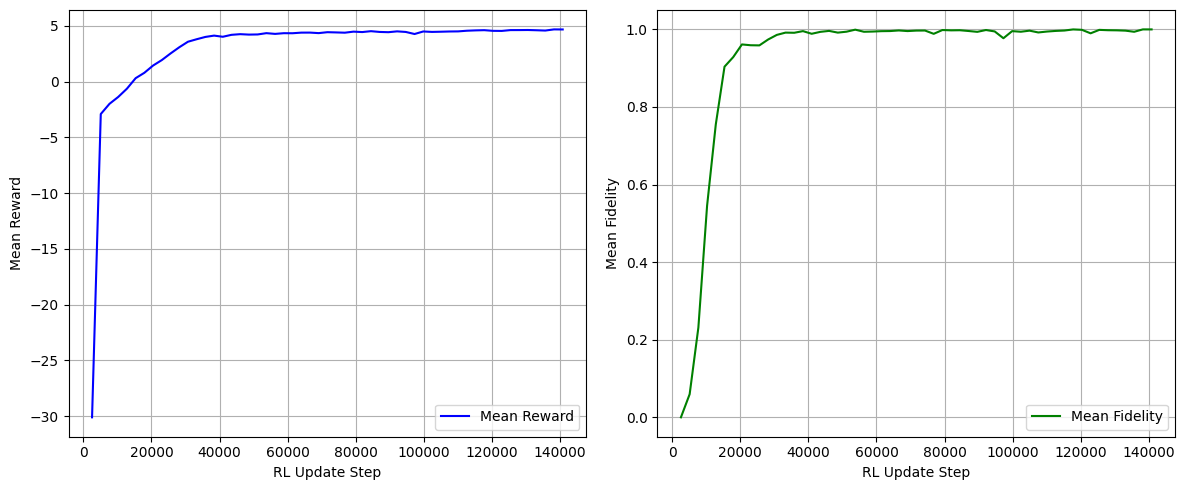

In [6]:
data_fpath = "episodic_data/transmon_reset/transmon_reset_.pkl"

# Load data
with open(data_fpath, "rb") as file:
    episodic_data = pickle.load(file)

df = pd.DataFrame(episodic_data)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Mean Reward (Loss)
axes[0].plot(df["timestep"], df["mean_reward"], label="Mean Reward", color="blue")
axes[0].set_xlabel("RL Update Step")
axes[0].set_ylabel("Mean Reward")
axes[0].legend()
axes[0].grid()

# Plot Mean Fidelity
axes[1].plot(df["timestep"], df["mean_fidelity"], label="Mean Fidelity", color="green")
axes[1].set_xlabel("RL Update Step")
axes[1].set_ylabel("Mean Fidelity")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()